# 决策树的问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target
axis = [
    X[:, 0].min()*1.1 - X[:, 0].max()*0.1,
    X[:, 0].max()*1.1 - X[:, 0].min()*0.1,
    X[:, 1].min()*1.1 - X[:, 1].max()*0.1,
    X[:, 1].max()*1.1 - X[:, 1].min()*0.1
]

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
def plot_decision_boundary(algo, axis):
    
    x0 = np.linspace(axis[0], axis[1], int(100 * (axis[1]-axis[0])))
    x1 = np.linspace(axis[2], axis[3], int(100 * (axis[3]-axis[2])))
    x0, x1 = np.meshgrid(x0, x1)
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = algo.predict(X_new)
    z = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_map = ListedColormap(["#f9a19a", "#90caf9", "#ffcb7f"])
    
    plt.contourf(x0, x1, z, linewidth=5, cmap=custom_map)

/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


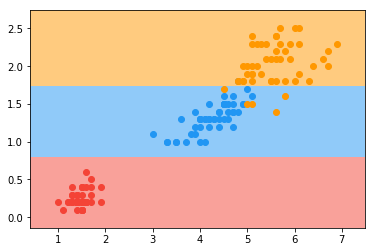

In [7]:
plot_decision_boundary(dt_clf, axis)
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#2196f3")
plt.scatter(X[y==2, 0], X[y==2, 1], color="#ff9800")
plt.show()

In [ ]:
X_new = np.delete(X, 13)